### Random Forest

by Piyush Sanghi

In [1]:
import pandas as pd
from sklearn import model_selection, ensemble, metrics
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Data Processing:

###### a) Import the data: shape should be (30000,24)

In [2]:
df = pd.read_excel("default_of_credit_card_clients.xls")

In [3]:
df.shape

(30000, 24)

###### b) Remove any rows that have missing data.

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(30000, 24)

We don't have any missing data as shape is same as before

###### c) The target / y variable is "default payment next month" column. Keep all predictors for the X df except for the target variable. 

In [6]:
X = df.drop(["default payment next month"], axis=1)
y = df[["default payment next month"]]

###### d) Split data into train / test set using an 70/30 split. Recall that you should be generating an X_train, X_test, y_train, and y_test.

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=10)

#### 2. Random Forest Classifier - Base Model:

###### a) Use the RandomForestClassifier in sklearn. Fit your model on the training data & make sure to add a random_state (check documentation to confirm how to do this).

In [8]:
model = ensemble.RandomForestClassifier(random_state=10)
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

###### b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [9]:
y_test_predicted = model.predict(X_test)
y_test_predicted_prob = model.predict_proba(X_test)

###### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics). These are the same tools from HW #3.

In [10]:
def calculate_classification_report_and_confusion_matrix(y_actual, y_predicted):
    #Printing the classification report
    print('-------------  Classification Report  -------------')
    print(metrics.classification_report(y_actual, y_predicted))
    
    print('-------------  Confusion Matrix  -------------')
    
    conf_matrix = metrics.confusion_matrix(y_actual, y_predicted)
    conf_matrix = pd.DataFrame(data=conf_matrix) #converting to dataframe
    
    #Plotting the confusion matrix
    sns.set(font_scale=1.5)
    sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 14}, cmap="YlGnBu", fmt='g')   

In [11]:
y_test_predicted = pd.DataFrame(data=y_test_predicted, columns=["default payment next month"])

-------------  Classification Report  -------------
             precision    recall  f1-score   support

          0       0.83      0.95      0.88      6982
          1       0.63      0.32      0.42      2018

avg / total       0.78      0.81      0.78      9000

-------------  Confusion Matrix  -------------


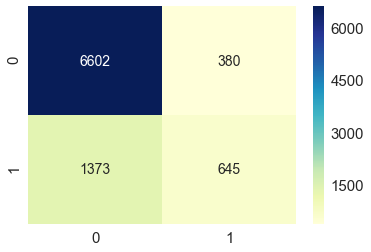

In [12]:
calculate_classification_report_and_confusion_matrix(y_test, y_test_predicted)

###### d) Calculate the roc_auc_score for this model. There are many ways to do this, but an example is to use the probabilities from step B and utilize the roc_auc_score from sklearn.

In [13]:
metrics.roc_auc_score(y_test, y_test_predicted_prob[:, 1])

0.7351985950564087

###### e) Calculate predictions for the training data & build the classification report & roc_auc_score. Are there signs of overfitting? Why or why not?

In [14]:
y_train_predicted = model.predict(X_train)
y_train_predicted_prob = model.predict_proba(X_train)

In [15]:
y_train_predicted = pd.DataFrame(data=y_train_predicted, columns=["default payment next month"])

-------------  Classification Report  -------------
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     16382
          1       0.99      0.91      0.95      4618

avg / total       0.98      0.98      0.98     21000

-------------  Confusion Matrix  -------------


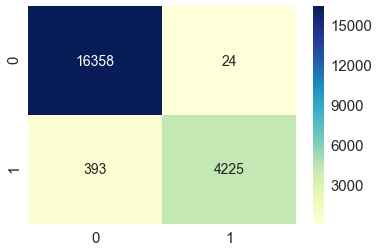

In [16]:
calculate_classification_report_and_confusion_matrix(y_train, y_train_predicted)

We do see signs of over-fitting. The f1-score, precision and recall is very high for train (0.98) when compared with test(0.78).

#### 3. Random Forest Classifier - Grid Search:

###### a) Use the RandomForestClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following: 

n_estimators: 50, 100, 500
max_features: 2, 4, sqrt
max_depth: 6, 8, 10, 12
Note: Feel free to try out more parameters, the above is the bare minimum for this assignment. The goal of the above parameters are to try a large but fairly fast grid search. This took about 8 minutes to run on your TAs computer but that time will vary greatly based on computational resources. 

Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters). 

In [17]:
param_grid = {
    'n_estimators': [50, 100, 500],
    'max_features': [2, 4, 'sqrt'],
    'max_depth'   : [6, 8, 10, 12],
    'random_state': [10]
}

# create Random Forest model 
model = ensemble.RandomForestClassifier()

# Create gridsearch object with various combinations of parameters
model_grid_search = model_selection.GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', refit=True, n_jobs=-1, verbose=5)
model_grid_search.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  9.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 500], 'max_features': [2, 4, 'sqrt'], 'max_depth': [6, 8, 10, 12], 'random_state': [10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=5)

###### b) Identify the best performing model:

In [18]:
print(', '.join("{0}={1}".format(key,val) for (key, val) in model_grid_search.best_params_.items()))
print('-------------------------------')
best_model = model_grid_search.best_estimator_
print(best_model)

max_depth=12, max_features=2, n_estimators=500, random_state=10
-------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)


###### c) Use the best estimator model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [19]:
y_test_predicted = best_model.predict(X_test)
y_test_predicted_prob = best_model.predict_proba(X_test)

###### d) Calculate the confusion matrix and classification report (both are in sklearn.metrics). 

In [20]:
y_test_predicted = pd.DataFrame(data=y_test_predicted, columns=["default payment next month"])

-------------  Classification Report  -------------
             precision    recall  f1-score   support

          0       0.83      0.96      0.89      6982
          1       0.69      0.32      0.44      2018

avg / total       0.80      0.82      0.79      9000

-------------  Confusion Matrix  -------------


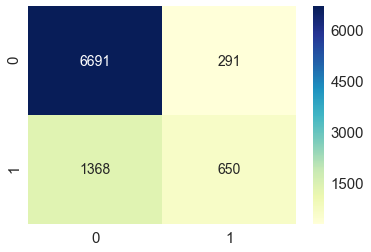

In [21]:
calculate_classification_report_and_confusion_matrix(y_test, y_test_predicted)

###### e) Calculate the roc_auc_score for this model.

In [22]:
metrics.roc_auc_score(y_test, y_test_predicted_prob[:, 1])

0.7860200617814065

###### f) Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. Are there signs of overfitting? Why or why not?

In [23]:
y_train_predicted = best_model.predict(X_train)
y_train_predicted_prob = best_model.predict_proba(X_train)

In [24]:
y_train_predicted = pd.DataFrame(data=y_train_predicted, columns=["default payment next month"])

-------------  Classification Report  -------------
             precision    recall  f1-score   support

          0       0.87      0.99      0.93     16382
          1       0.92      0.48      0.63      4618

avg / total       0.88      0.88      0.86     21000

-------------  Confusion Matrix  -------------


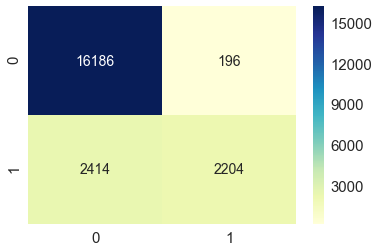

In [25]:
calculate_classification_report_and_confusion_matrix(y_train, y_train_predicted)

The model now fits better and does not show signs of overfitting as the precision, recall and f1-scores between train and test are stable (drop of less than 10%)

#### 4. Create a feature importance plot for your best performing model.

<BarContainer object of 23 artists>

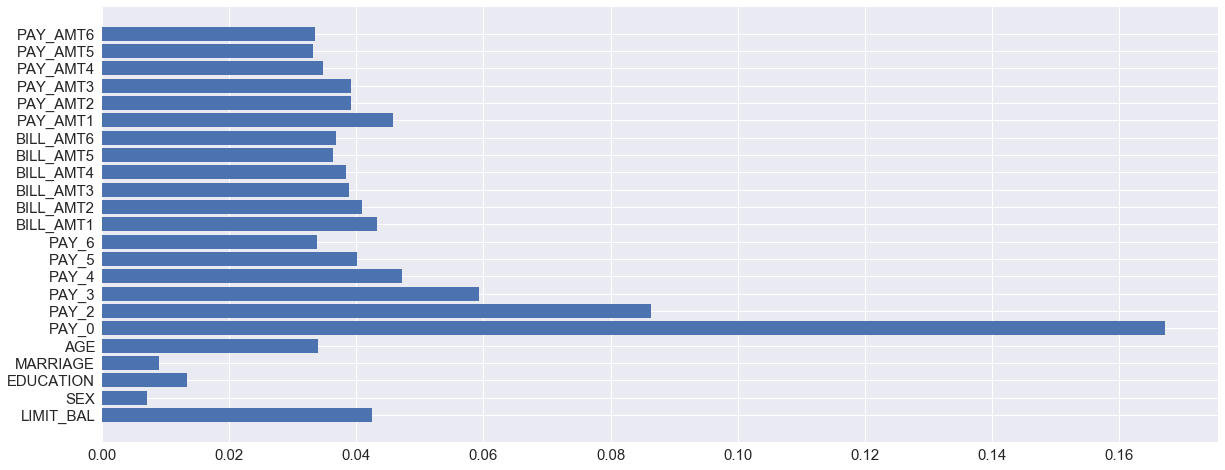

In [26]:
plt.rcParams["figure.figsize"] = (20, 8)
plt.barh(X_train.columns, best_model.feature_importances_)

###### a) What are the top 5 features for this model?

In [27]:
df = pd.DataFrame(data=list(zip(X_train.columns, best_model.feature_importances_)), columns=['Feature_Name', 'Importance'])

df.sort_values(['Importance'], ascending=False, inplace=True)
df.head(5)

,Feature_Name,Importance
5,PAY_0,0.167265
6,PAY_2,0.086292
7,PAY_3,0.059374
8,PAY_4,0.047246
17,PAY_AMT1,0.045765
